In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

Primero generar los Datos

In [2]:
N=1000
gaussian_quantiles=make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X , Y =gaussian_quantiles

In [3]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


In [4]:
Y= Y[:, np.newaxis]

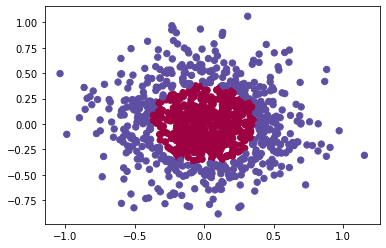

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

Estos datos (Los de la celda de arriba ) son los que la red va a aprender a distinguir

In [6]:
#funciones de activacion
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:    
        return np.maximum(0, x)

In [7]:
#funcion de perdida se usara error cuadradtico medio
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [8]:
#crear estructura de red neuronal 
#cada estrucutra tiene pesos y bias
def initialize_parameters_deep(layers_dim):  # esto va a recibir las dimensiones de las capas ocultas
  parameters ={}
  L=len(layers_dim)
  for l in range (0,L-1): #creando los pesos de manera aleatoria
    parameters['W'+str(l+1)]=(np.random.rand(layers_dim[l],layers_dim[l+1]) *2)-1 #obtengo los pesos W
    parameters['b'+str(l+1)]=(np.random.rand(1,layers_dim[l+1]) *2)-1             #obtengo el  bias  b
  return parameters  

In [9]:
np.random.rand(4,2)

array([[0.4803766 , 0.54663482],
       [0.07290121, 0.17143323],
       [0.1475239 , 0.02471657],
       [0.32339214, 0.82821483]])

In [10]:
layer_dims=[2,4,8,1]  # esto genera una red con tres capas de 4 8 y 1 neurona respectivamente , el dos hace referencia a la capa de entrada
params=initialize_parameters_deep(layer_dims) 

In [11]:
params

{'W1': array([[ 0.47375968, -0.64337451,  0.36931583,  0.22655526],
        [-0.96982286, -0.5450642 ,  0.13250998,  0.36529278]]),
 'W2': array([[-0.98033963, -0.47738536,  0.72120383,  0.13428281, -0.4253797 ,
          0.44912406,  0.85459504, -0.56479167],
        [ 0.11082605,  0.73074641, -0.30189832,  0.52988139, -0.57175983,
          0.65131487, -0.33105952,  0.43700792],
        [-0.56783599, -0.73540964,  0.97205591, -0.6784595 , -0.39894264,
         -0.99929939, -0.25188665,  0.35741112],
        [-0.61791475,  0.63423936, -0.9967806 ,  0.04121212,  0.70441413,
          0.94503763, -0.18807733, -0.71419138]]),
 'W3': array([[-0.21029141],
        [-0.24772009],
        [-0.44311773],
        [ 0.98426347],
        [ 0.93429021],
        [ 0.80540822],
        [ 0.91489169],
        [-0.27716441]]),
 'b1': array([[ 0.60831595, -0.72213463, -0.33714371,  0.38498851]]),
 'b2': array([[-0.27781896, -0.86431055,  0.38849953, -0.69720858, -0.88570833,
          0.40572415, -0.3

In [12]:
print(params['W1'])
print(params['W1'].shape)

[[ 0.47375968 -0.64337451  0.36931583  0.22655526]
 [-0.96982286 -0.5450642   0.13250998  0.36529278]]
(2, 4)


In [13]:
X.shape

(1000, 2)

Entrenamiento hacia adelante Forward 15/28

In [14]:
print(np.matmul(X,params['W1']))
print(np.matmul(X,params['W1']).shape) # otra manera de hacer el producto punto es:  X@params['W1]


[[-0.29271557 -0.26692098  0.08885992  0.1558493 ]
 [ 0.06557391 -0.33419801  0.16809321  0.14050561]
 [ 0.37273376 -0.04669461  0.07131216 -0.02633381]
 ...
 [-0.54704694 -0.71447121  0.26895888  0.38726786]
 [ 0.04436309  0.08812124 -0.03621256 -0.04484319]
 [-0.40055176 -0.58506537  0.22648173  0.31113111]]
(1000, 4)


In [15]:
#se crea la cadena para pasar parametros
#forward propagation
def train(x_data,learning_rate,params,training=True):
  params['A0']=x_data

  params['Z1']= np.matmul(params['A0'],params['W1']) + params['b1']
  params['A1']= relu(params['Z1'])

  params['Z2']= np.matmul(params['A1'],params['W2']) + params['b2']
  params['A2']= relu(params['Z2'])

  params['Z3']= np.matmul(params['A2'],params['W3']) + params['b3']
  params['A3']= sigmoid(params['Z3'])

  output=params['A3']
 
  if training:
     ##Backpropagation 16/28
    params['dZ3']=mse(Y,output,True)*sigmoid(params['A3'],True)   #dimension de params[dZ3] (1000,1)
    params['dW3']=np.matmul(params['A2'].T,params['dZ3'])         #dimesnion de params[A2] (8,1000) ;dimension de params[A2].T  (1000,8) 

    params['dZ2']=np.matmul(params['dZ3'],params['W3'].T)*relu(params['A2'],True)
    params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

    params['dZ1']=np.matmul(params['dZ2'],params['W2'].T)*relu(params['A1'],True)
    params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

     ##Gradient Descent
    params['W3']=params['W3']-params['dW3']*learning_rate # 0.0001 es el learning rate
    params['b3']=params['b3']-(np.mean(params['dZ3'],axis=0,keepdims=True))*learning_rate #se pone la media por que params dW3 es un arreglo con 1000 datos

    params['W2']=params['W2']-params['dW2']*learning_rate 
    params['b2']=params['b2']-(np.mean(params['dZ2'],axis=0,keepdims=True))*learning_rate

    params['W1']=params['W1']-params['dW1']*learning_rate 
    params['b1']=params['b1']-(np.mean(params['dZ1'],axis=0,keepdims=True))*learning_rate 
  
  return output

Entrenamiento de la red neuronal y analisis de resultados 17/28

In [16]:
## Entrenando la red neuronal
layer_dims=[2,4,8,1]  
params=initialize_parameters_deep(layer_dims) 
errors = []
for _ in range (50000):
  output = train(X,0.00001,params)
  if _ % 25 == 0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

0.0511506230118313
0.05110752681915132
0.05106444968404641
0.051021426183389465
0.05097861872412543
0.05093619602511215
0.05089380730353432
0.0508514684487719
0.050809199048431966
0.05076700186273464
0.05072487839589806
0.0506828302544664
0.05064085844352873
0.05059896355160864
0.05055711134916785
0.05051529421617355
0.05047356451897562
0.05043191910726306
0.05039028442790515
0.050348541020698606
0.05030636718577202
0.050264276492777656
0.050222269764468065
0.050180362941503555
0.0501385491588349
0.050096819482745046
0.050055177331094866
0.05001360713149485
0.04997212457857105
0.049930728091250244
0.04988939873714976
0.049848156941494415
0.04980700826083773
0.049765971550875567
0.0497250378109877
0.04968419031290259
0.049643426480554066
0.04960274440515687
0.04956214264296712
0.049521675846344475
0.04948135096371785
0.04944116661683671
0.04940112428233002
0.04936116911504888
0.04932138856784168
0.04928200309910515
0.04924264156978167
0.049203318175313156
0.04916403011015323
0.049124793

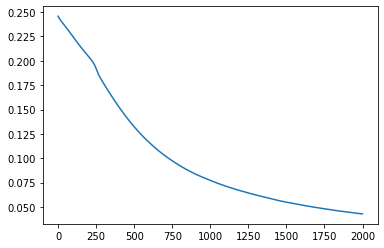

In [ ]:
plt .plot(errors)

In [17]:
#Creando Data De Prueba
data_test=(np.random.rand(1000,2)*2)-1
y=train(data_test,0.001,params,training=False)

In [18]:
y=np.where(y>=0.5,1,0)

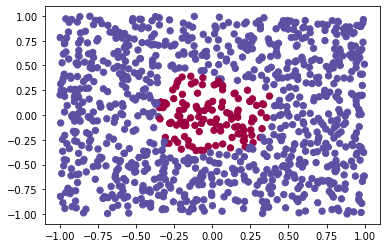

In [19]:
plt.scatter(data_test[:,0],data_test[:,1],c=y[:,0],s=40,cmap=plt.cm.Spectral)